# Практическая работа №3: Статистический анализ социальных сетей
Выполнила студентка гр. 0383 Юлия Рудакова. Вариант №64

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада** $-$ элемент сети, представляющий собой пару акторов и связь между ними, либо её отсутствие 

$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** — тройка чисел <M, A, N>, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = (^2_g) - A - M$

**Индекс взаимности Каца-Пауэлла** — хар-ка измерения тенденции акторов в группе:

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.

Вероятность взаимного выбора между любой произвольной парой акторов равна

 $d^2/(g-1)^2$

Вероятность того, что общая диада является взаимной:

$p(i → j ∩ j → i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$

Оценка при свободном выборе 

$p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$

Оценка при фиксированном выборе 

$p_{ekp}^\prime = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$

**Индекс взаимности Бандиопадхьяйя** — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}.$

$M_{\min} = \max f(t)$, $0\leqslant t \leqslant g$

$M_{\max} = \lfloor\frac{1}{2}(\sum_{i=1}^gx_{i+}-\max_{0 \leqslant t \leqslant g}g(t))\rfloor$
, где 

$f(t)=\sum_{i=1}^tx_{i+}-t(g-1)-(^t_2)$

$g(t)=\sum_{i=1}^tx_{i+}-t(t-1)-\sum_{i=t+1}^g\min(t,x_{i+})$

**Нулевые гипотезы**
 Для равномерного распределения

$H_0: L \sim B(g(g-1), \frac{1}{2})$

Статистика

$z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$ 

Для распределени Бернулли

$H_0 : L \sim B(g(g-1), P_0)$

Статистика

$z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$

**Доверительный интервал**

Оценка $P$

$P_{est} = \frac{\sum_{i=1}^g\sum_{j=1}^gx_{ij}}{g(g-1)}=\frac{l}{g(g-1)}$

Доверительный интервал:

$P_{lower} \leqslant P \leqslant P_{upper}$

$P_{lower} = P_{est} - Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

$P_{upper} = P_{est} + Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

Где $Z_{\frac{\alpha}{2}}: Ф(Z_{\frac{\alpha}{2}} = 0.5 - \frac{\alpha}{2})$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [16]:
if(!require('igraph')) {
        install.packages('igraph')
        library('igraph')
        
    }
if(!require('statnet')){
        install.packages('statnet')
        library('statnet')
}

1)  С помощью библиотеки igraph смоделировать случайный орграф
G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R
для модели случайного графа Эрдеша—Реньи существует функция
erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите
её.
p = 0.76, g = 85

In [17]:
g <- 85
p <- 0.76
graph_erd_ren <- erdos.renyi.game(g, p, "gnp", directed = T)
adj_matr <- as_adjacency_matrix(graph_erd_ren)
my_matrix <- as.matrix(adj_matr)
net <- network(as_adjacency_matrix(graph_erd_ren), directed = T)

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient



Так как граф строится случайно и по двум параметрам(g и p), то мы можем посчитать вероятность того, что получится какое-то количество рёбер как:

$p^L (1-p)^{(^2_g) - L}$.


2)  Отобразить полученный орграф.

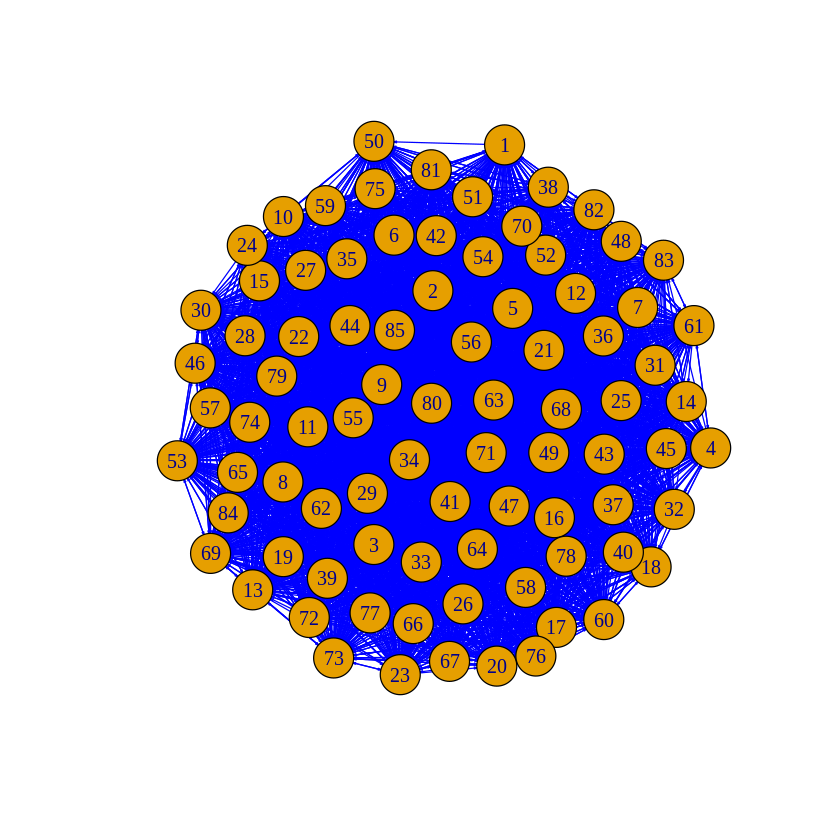

In [18]:
plot(graph_erd_ren, 
    layout = layout_with_fr, 
    vertex.label = V(graph_erd_ren)$name, 
    edge.arrow.size=0.1, 
    edge.color='blue')

3) Вычислить «пятичисловую сводку» для графа G𝑑.

In [19]:
print('размер графа')
print(network.size(net))
print("плотность графа")
print(gden(net))
print("число компонент графа")
print(components(net))
print("диаметр") 
print(diameter(graph_erd_ren))
print("транзитивность") 
print(gtrans(net, mode = "graph"))

[1] "размер графа"
[1] 85
[1] "плотность графа"
[1] 0.7647059
[1] "число компонент графа"
[1] 1
[1] "диаметр"
[1] 2
[1] "транзитивность"
[1] 0.7643748


4) Вычислить цензус диад. Сделать выводы.

In [31]:
census <- dyad_census(graph_erd_ren)
M <- census$mut
A <- census$asym
N <- census$null
print(census)

$mut
[1] 2082

$asym
[1] 1296

$null
[1] 192



Выводы: 2082 взаимная свявь, 1296 невзаимных связей и 192 пары вершин, где связи нет

5) Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

Фиксируем $d=60$

Тогда оценка по методу моментов:

In [32]:
d <- 60
kp_index_est_fix = (2*(g-1) * M - g*d*d) / (g*d*(g-1-d))
print("Оценка при d=60") 
print(kp_index_est_fix)

[1] "Оценка при d=60"
[1] 0.3576471


Оценка по методу моментов, но при свободном выборе. Тут же считаем L и L2 для будущих заданий.

In [33]:
L_arr <- rowSums(my_matrix)
L <- sum(L_arr)
L2_arr <- rep(0, nrow(my_matrix))
for(i in 1:nrow(my_matrix))
  L2_arr[i] <- L_arr[i]^2
L2 <- sum(L2_arr)
kp_index_est_free <- (2 * ((g - 1)^2) * M - L^2 + L2) / (L * ((g-1)^2) - L^2 + L2)
print("Оценка при свободном выборе")
print(kp_index_est_free)

[1] "Оценка при свободном выборе"
[1] -0.008659097


Выводы:
При таком количестве связей примерно в графе скорее преобладают взаимный связи, а в свободном их меньше, чем односторонних или отсутствие.

6) Вычислить вероятность того, что связь будет взаимной для каждого случая.

При фиксированном d:

In [34]:
p_fix <- (d / (g-1)) * ((d/(g-1)) + kp_index_est_fix*(g - 1 - d) / (g - 1))
print(p_fix)

[1] 0.5831933


При свободном:

In [35]:
p_free <- 0
for(i in 1:(nrow(my_matrix) - 1))
  for(j in (i + 1):nrow(my_matrix))
    p_free <- p_free + (L_arr[i] * L_arr[j])/((g-1)^2)
p_free <- p_free * 2 / (g*(g-1))

print(p_free)

[1] 0.5847515


7) Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [36]:
F_func <- function(t) {
  return (sum(L_arr[1:t]) - t * (g - 1) - (factorial(t)/(factorial(2) * factorial(t-2))))
}

G_func <- function(t) {
  res <- 0
  for(i in (t + 1):g)
    res <- res + min(t, L_arr[i])
  return (sum(L_arr[1:t]) - t* (t-1) - res)
}

F_arr = rep(2, g)
for(i in 2:g)
  F_arr[i] = F_func(i)
  
G_arr = rep(2, g - 1)
for(i in 2:(g - 1))
  G_arr[i] = F_func(i)
  
M_min <- max(F_arr)
M_max <- floor(0.5 * (L - max(G_arr)))

B_index <- (M - M_min) / (M_max - M_min)

print(B_index)


[1] 0.7627429


Выводы: в данном примере количество взаимных диад составляют примерно 76% от их максимально возможного количества.

8) Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе
G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при
уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

a = 0.01


In [37]:
alpha <- 0.01
binom.test(floor(L), g*(g-1), 0.5)


	Exact binomial test

data:  floor(L) and g * (g - 1)
number of successes = 5460, number of trials = 7140, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.7546899 0.7745053
sample estimates:
probability of success 
             0.7647059 


$p-value < a$, то есть гипотезу мы отвергаем. $a_{\max}$ должен быть меньше p-value, т.е. $a_{\max} = $2.2е-16

9)  Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑
имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается. 

$P_0$ = 0.50, a = 0.01

In [41]:
p0 <- 0.50
binom.test(floor(L), g*(g-1), p0)


	Exact binomial test

data:  floor(L) and g * (g - 1)
number of successes = 5460, number of trials = 7140, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.7546899 0.7745053
sample estimates:
probability of success 
             0.7647059 


Ситуация аналогичная прошлому пункту, отвергаем теорию, $a_{\max}$ такое же.

10) Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы

In [42]:
new_alpha <- 1-alpha

p_est <- L / (g*(g-1))
laplas = 0.5 - new_alpha/2
print(laplas)

[1] 0.005


По таблице находим значение $z_{a/2}$ = 0.0125

In [43]:
z_a2 <- 0.0125
p_down <- p_est - z_a2*sqrt(p_est * (1 - p_est) / (g*(g-1)))
p_up <- p_est + z_a2*sqrt(p_est * (1 - p_est) / (g*(g-1)))

print(p_down)
print(p_up)


[1] 0.7646431
[1] 0.7647686


Доверительный интервал $ 0.7636626 \leqslant p_e \leqslant 0.7637883$ имеет очень близкие к правде значения, тысячными можно пренебречь, если учесть погрешность.

## Выводы
В результате работы был изучен случайно сгенерированный граф. Для него были посчитаны оценки индексов, описывающих его диады(их количество и т.д.), вероятности возникновения взаимных диад, а также опровергнуты 2 теории о распределении диад. Были построены доверительные интервалы для оценки вероятности возникновения диады между 2 рёбрами. Вычисленные значение подтверждают наш действительный параметр.